In [4]:
import numpy as np
class Neural_Network(object):
    def __init__(self, Lambda):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)

        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + (self.Lambda)*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        
        dJdW1 = np.dot(X.T, delta2)/X.shape[0]  + (self.Lambda)*self.W1
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [29]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        print "test", self.N.costFunction(X, y)
        print "gradInit", self.N.computeGradients(X,y)
        self.N.setParams(params)
        print "test2", self.N.costFunction(X, y)
        print "gradUpdate", self.N.computeGradients(X,y)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()
        print params0
        
        
        options = {'maxiter': 200, 'disp' : False}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)
        
        print "res x", _res.x
        
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res


0.0001
[ 0.33347653 -1.12975893 -0.86482241  0.34270454  2.87498379  0.13370021
  0.79822677  0.3000269  -0.39329544]
test 0.0165152717972
gradInit [-0.00493429 -0.00195269  0.00220597 -0.00305975 -0.00058311  0.00149841
 -0.02272582 -0.02228662 -0.0144645 ]
test2 0.0165152717972
gradUpdate [-0.00493429 -0.00195269  0.00220597 -0.00305975 -0.00058311  0.00149841
 -0.02272582 -0.02228662 -0.0144645 ]
test 0.0165152717972
gradInit [-0.00493429 -0.00195269  0.00220597 -0.00305975 -0.00058311  0.00149841
 -0.02272582 -0.02228662 -0.0144645 ]
test2 0.0165152717972
gradUpdate [-0.00493429 -0.00195269  0.00220597 -0.00305975 -0.00058311  0.00149841
 -0.02272582 -0.02228662 -0.0144645 ]
test 0.0165152717972
gradInit [-0.00493429 -0.00195269  0.00220597 -0.00305975 -0.00058311  0.00149841
 -0.02272582 -0.02228662 -0.0144645 ]
test2 0.0152843540232
gradUpdate [-0.00481831 -0.00199757  0.00200931 -0.00293    -0.00059657  0.00134403
 -0.02148511 -0.02092195 -0.01359578]
test 0.0152843540232
gradIn

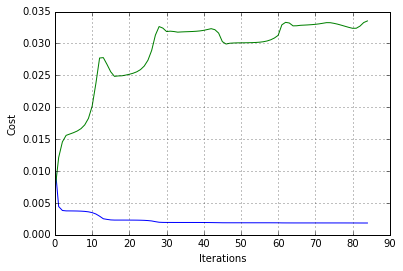

In [30]:


#Training Data:
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
Y = np.array(([75], [82], [88], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [77], [52], [75]), dtype=float)

#Normalize:
X = X/np.amax(X, axis=0)
Y = Y/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(X, axis=0)
testY = testY/100 #Max test score is 100

#Regularization Parameter
Lambda = 0.0001
print Lambda
N = Neural_Network(Lambda)
T = trainer(N)
T.train(X, Y, testX, testY)

%pylab inline
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')



Populating the interactive namespace from numpy and matplotlib


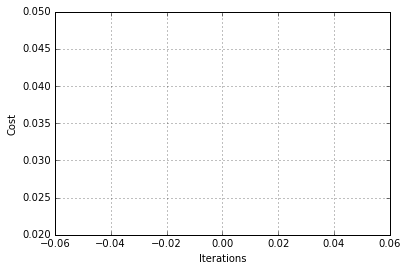

In [7]:
#Plot cost during training:
%pylab inline
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [ ]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [ ]:
allOutputs = NN.forward(allInputs)

In [ ]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

In [ ]:
#3D plot:
#Uncomment to plot out-of-notebook (you'll be able to rotate)
%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*Y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')